## Plotting of results for paper figures 

Also contains result extraction for the tables in the paper

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from importlib import reload
import xgboost as xgb 
from matplotlib.ticker import FormatStrFormatter

codebase_path = '/data/home/wpw035/Codebase'
sys.path.insert(0, codebase_path) #add path to my codebase models



In [2]:
from Genral_plotting import plotting as plot_nb
reload(plot_nb)

<module 'Genral_plotting.plotting' from '/data/home/wpw035/Codebase/Genral_plotting/plotting.py'>

In [3]:
path_xg_prot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Prot'
path_xg_rna = 'XGboost/Unseen_cell_line_testing/LC-metric-results/RNA'
path_xg_hot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/One-hot'
path_xg_phosltl = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Phos_LTL'
path_mm = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Mean_model'

path_cnn_prot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Prot'
path_cnn_rna = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/RNA'
path_cnn_hot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/One-hot'
path_cnn_phosltl = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Phos_LTL'


In [4]:
def find_repeats(dir_path, num_runs):
    r2_reps = {}
    mse_reps = {}
    rho_reps = {}
    for run in range(num_runs):
        temp_df = pd.read_csv(f'{dir_path}/run{run}')
        r2_reps[f'run{run}'] = temp_df['r2']
        mse_reps[f'run{run}'] = temp_df['mse']
        rho_reps[f'run{run}'] = temp_df['rho']
    r2_reps = pd.DataFrame(r2_reps)
    mse_reps = pd.DataFrame(mse_reps)
    rho_reps = pd.DataFrame(rho_reps)
    
    r2_reps.index = temp_df['train size']
    mse_reps.index = temp_df['train size']
    rho_reps.index = temp_df['train size']
    
    return r2_reps, mse_reps, rho_reps

In [5]:
r2_xg_rna, mse_xg_rna, rho_xg_rna = find_repeats(path_xg_rna, 30)
r2_xg_prot, mse_xg_prot, rho_xg_prot = find_repeats(path_xg_prot, 30)
r2_xg_hot, mse_xg_hot, rho_xg_hot = find_repeats(path_xg_hot, 30)
r2_mm, mse_mm, rho_mm = find_repeats(path_mm, 30)
r2_xg_ltl, mse_xg_ltl, rho_xg_ltl= find_repeats(path_xg_phosltl, 30)

In [6]:
r2_cnn_rna, mse_cnn_rna, rho_cnn_rna = find_repeats(path_cnn_rna, 30)
r2_cnn_prot, mse_cnn_prot, rho_cnn_prot = find_repeats(path_cnn_prot, 30)
r2_cnn_hot, mse_cnn_hot, rho_cnn_hot = find_repeats(path_cnn_hot, 30)
r2_cnn_ltl, mse_cnn_ltl, rho_cnn_ltl= find_repeats(path_cnn_phosltl, 30)

In [7]:
r2_cnn_ltl.mean(axis=1).iloc[-3: ], mse_cnn_ltl.mean(axis=1).iloc[-3 : ]

(train size
 5739    0.722537
 6315    0.715928
 6949    0.726091
 dtype: float64,
 train size
 5739    1.867818
 6315    1.909865
 6949    1.843885
 dtype: float64)

In [8]:
r2_cnn_rna.mean(axis=1).iloc[-3: ],  mse_cnn_rna.mean(axis=1).iloc[-3 : ]

(train size
 5739    0.723781
 6315    0.724864
 6949    0.723408
 dtype: float64,
 train size
 5739    1.858010
 6315    1.851060
 6949    1.860859
 dtype: float64)

In [9]:
r2_xg_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.009954,-0.009088,-0.500123,-0.000415,-0.039736,-0.001795,-0.068352,-0.002793,-0.253178,-0.000004,...,-0.133732,-0.009688,-0.005611,-0.227373,-0.004479,-0.033027,-0.039636,-0.030458,-0.044046,-0.009951
4,-0.058944,-0.000398,-0.304536,-0.013491,-0.239060,-0.001395,-0.449144,-0.007479,-0.136185,-0.094438,...,-0.061510,0.014660,0.011157,-0.030004,-0.030140,-0.022743,0.003752,-0.077588,-0.154219,-0.235248
11,-0.525867,-0.031703,-0.288217,-0.075059,-0.097309,0.002581,-0.083701,-0.027459,-0.010986,0.059817,...,-0.125346,-0.013223,-0.001285,-0.470155,-0.312318,-0.035571,0.004593,-0.021544,-0.077788,-0.222978
26,-0.269531,-0.173180,-0.255022,-0.015921,-0.073659,-0.242468,-0.436758,0.060044,-0.044397,0.040483,...,-0.320335,-0.028935,-0.181125,-0.136660,-0.125319,-0.058071,-0.044510,-0.012426,-0.122179,0.020992
64,-0.043892,-0.006314,0.047613,0.022329,-0.057240,-0.023492,-0.182624,0.095169,-0.070310,0.030106,...,0.017497,0.059440,-0.048258,-0.090294,-0.370551,-0.097418,-0.166358,-0.045328,-0.218718,0.058709
70,-0.136266,-0.067419,-0.015485,-0.088584,-0.164775,-0.065732,-0.023687,-0.021685,-0.151803,0.009023,...,-0.134037,0.016311,-0.005237,-0.061769,-0.050393,-0.037519,-0.178122,-0.124607,-0.035792,-0.036772
77,-0.015688,0.004920,0.029122,-0.028281,-0.113950,-0.499608,0.050679,-0.128978,-0.189730,-0.028520,...,0.002297,0.049045,0.014436,0.006920,-0.101966,0.038693,-0.424473,0.002132,0.012716,-0.002004
85,0.007000,-0.017266,0.019212,0.043408,0.004992,0.011669,-0.061211,0.027078,-0.062456,-0.150449,...,0.079468,-0.020988,-0.080307,0.026412,0.044951,0.132643,-0.178461,-0.045350,0.037842,-0.064926
93,0.102250,-0.191789,0.067053,0.018247,-0.178158,0.047405,0.008060,-0.381475,-0.039464,-0.005450,...,0.052519,-0.022274,-0.010939,-0.050680,-0.108497,0.056249,0.021531,0.130064,0.070274,-0.003356


In [10]:
r2_cnn_hot

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.017931,-0.002943,-0.161587,-0.055302,-0.162550,-0.029778,-0.348415,-0.067241,-0.448473,-0.030569,...,-0.290428,0.010259,-0.035367,-0.208521,-0.037334,-0.123950,-0.002671,-0.035398,-0.601932,-0.097900
4,-0.084070,-0.180520,-0.553334,-0.052193,-0.187675,-0.027582,-0.119113,-0.050571,-0.113294,-0.012712,...,-0.065335,-0.031093,-0.035612,-0.137549,-0.003526,-0.105414,-0.020448,-0.140289,-0.271664,-0.156939
11,-0.072104,-0.055683,-0.302498,-0.029463,-0.142702,-0.028336,-0.005901,-0.065241,-0.104995,0.002909,...,-0.002038,-0.034859,-0.001631,-0.137295,-0.316165,-0.094066,-0.038243,-0.063219,-0.094697,-0.013053
26,-0.131030,-0.012338,-0.048795,-0.066177,-0.163086,-0.085574,-0.174280,-0.038120,-0.086142,0.009810,...,-0.147446,-0.004152,0.026265,-0.120345,-0.018984,-0.016162,-0.046035,-0.080310,-0.050105,-0.017192
64,0.034867,-0.001127,-0.001301,0.037830,-0.017971,-0.022654,-0.131776,-0.052811,-0.102882,0.029161,...,0.009775,0.017349,0.083665,0.001612,0.024253,-0.076490,0.009649,0.048773,0.084698,0.061040
70,0.073617,0.018283,0.018964,-0.045899,-0.037241,0.034287,-0.040741,0.074168,-0.086980,0.013774,...,0.014688,0.000589,0.043124,-0.031106,0.046975,-0.083396,-0.013417,0.004447,0.078052,0.069122
77,-0.039120,0.024000,0.021072,-0.071021,0.042224,0.015977,-0.023121,-0.005738,-0.102853,-0.026614,...,-0.093012,0.020294,0.070160,0.039095,0.036983,0.024355,0.005636,0.096908,0.095592,0.163384
85,0.022487,0.060716,0.021285,-0.000686,0.007897,0.036465,0.065209,0.055809,-0.090028,-0.002009,...,-0.078931,0.044533,0.067081,-0.048162,0.023276,-0.073731,-0.049071,0.110003,0.089700,0.147943
93,0.015348,0.099905,0.119357,0.019995,0.007782,0.030218,-0.020972,0.090713,-0.084385,0.022524,...,0.016801,0.046584,0.090381,0.129667,-0.008625,-0.067113,0.037362,0.093936,0.058546,0.152063


In [11]:
r2_cnn_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.008044,-0.007811,-0.054011,-0.014878,0.012506,0.006172,-0.002769,-0.017353,-0.067927,0.073763,...,-0.151968,-0.007694,0.001929,-0.042796,-0.009753,-0.019255,-0.002069,-0.038965,0.002425,0.066989
4,-0.014614,0.026534,-0.215737,-0.027604,0.012641,-0.002382,-0.090962,0.007107,-0.020792,-0.020793,...,-0.014671,0.001816,-0.008916,-0.046277,-0.003119,-0.032496,0.002683,0.016877,0.026432,-0.008045
11,-0.016307,0.015431,-0.074683,-0.006199,-0.028412,-0.004450,-0.002938,-0.019699,-0.035892,0.045645,...,-0.008674,-0.005613,0.001370,-0.091026,-0.000131,-0.038088,0.001839,0.020297,-0.024672,0.064810
26,-0.005000,-0.001642,-0.027063,-0.017734,0.020030,0.000731,-0.002682,0.042185,-0.039811,0.010780,...,-0.012864,-0.024132,-0.021545,-0.045779,0.000874,-0.055803,0.004178,-0.027137,-0.009734,0.064122
64,-0.001036,0.026932,-0.017589,-0.010203,0.034199,0.004768,0.009918,0.017161,-0.026825,0.044371,...,-0.011943,0.006262,0.003682,-0.063393,0.000407,0.037859,-0.009163,-0.006365,0.020307,0.031851
70,0.000467,0.022171,-0.002208,-0.012138,0.006877,-0.000768,0.010848,-0.018562,-0.022975,0.061487,...,-0.015364,0.032648,-0.004693,-0.033723,0.004792,-0.043061,0.001063,0.004311,0.018363,0.025357
77,-0.015301,0.025538,-0.050619,-0.018094,0.011072,0.006011,0.012504,-0.024091,-0.041124,0.009719,...,0.003071,-0.005462,0.011958,-0.010065,-0.016419,-0.030070,0.004207,0.023933,0.007416,0.071154
85,0.006285,0.029968,0.057411,-0.005487,-0.002296,0.004501,0.115155,-0.023764,-0.023245,0.012775,...,0.019652,0.021115,0.001336,-0.024979,0.013652,-0.026923,0.008222,-0.028384,-0.007107,0.089575
93,-0.028653,0.023326,-0.003011,0.000772,0.023786,0.003851,0.003852,-0.004563,-0.044062,0.044031,...,-0.007510,0.020762,-0.000736,-0.081820,-0.010782,-0.012398,0.007629,0.006913,0.033576,0.040076


In [12]:
r2_xg_hot

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.011372,-0.009238,-0.040819,-0.019837,-0.025811,-0.003792,-0.007493,-0.028733,-0.253178,0.001539,...,-0.133732,-0.009719,-0.005191,-0.066728,-0.004673,-0.032726,0.004099,-0.031210,-0.007045,-0.004910
4,-0.007006,-0.009048,-0.224256,-0.020242,-0.028380,0.002123,0.001712,-0.027885,-0.044098,-0.067415,...,-0.023742,-0.005598,-0.006250,-0.051263,0.007673,-0.032580,0.004494,-0.028853,-0.082854,-0.163634
11,0.003953,-0.002218,0.012489,-0.015888,-0.001201,0.003456,0.015964,-0.032167,-0.027927,-0.009461,...,-0.025950,-0.006957,0.005467,-0.031086,0.010863,-0.025368,0.005592,-0.010792,0.025955,0.002773
26,0.047020,0.038739,0.042853,-0.012542,0.027192,0.013449,0.061283,-0.026532,-0.037519,0.018186,...,-0.007850,-0.005655,0.008034,-0.006405,0.058960,-0.001577,0.024162,-0.016319,0.046077,0.009881
64,0.076905,0.049355,0.092959,0.017633,0.084229,0.059212,0.126371,0.074541,0.009133,0.010435,...,0.046761,0.026683,0.080766,0.076012,0.094827,0.038869,0.062089,0.070916,0.110826,0.050097
70,0.091899,0.037552,0.100332,0.009271,0.083118,0.082954,0.133113,0.070312,0.001626,0.003685,...,0.046763,0.046179,0.054647,0.089008,0.110747,0.027004,0.069374,0.066222,0.116098,0.086872
77,0.109852,0.065986,0.105561,0.059259,0.098544,0.072077,0.140140,0.103370,0.069331,-0.005615,...,0.006421,0.071927,0.059274,0.057972,0.104987,0.119152,0.092203,0.142258,0.127968,0.113335
85,0.111842,0.035010,0.145256,0.043242,0.086651,0.111204,0.142287,0.109861,0.067361,0.005263,...,0.085806,0.063423,0.070031,0.125511,0.090815,0.098483,0.108740,0.143858,0.121970,0.128922
93,0.109263,0.056312,0.176878,0.060320,0.099354,0.125963,0.156698,0.113717,0.034883,-0.001635,...,0.042847,0.048265,0.050893,0.127351,0.101770,0.108730,0.110765,0.135977,0.137199,0.131880


In [13]:
r2_xg_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.009954,-0.009088,-0.500123,-0.000415,-0.039736,-0.001795,-0.068352,-0.002793,-0.253178,-0.000004,...,-0.133732,-0.009688,-0.005611,-0.227373,-0.004479,-0.033027,-0.039636,-0.030458,-0.044046,-0.009951
4,-0.058944,-0.000398,-0.304536,-0.013491,-0.239060,-0.001395,-0.449144,-0.007479,-0.136185,-0.094438,...,-0.061510,0.014660,0.011157,-0.030004,-0.030140,-0.022743,0.003752,-0.077588,-0.154219,-0.235248
11,-0.525867,-0.031703,-0.288217,-0.075059,-0.097309,0.002581,-0.083701,-0.027459,-0.010986,0.059817,...,-0.125346,-0.013223,-0.001285,-0.470155,-0.312318,-0.035571,0.004593,-0.021544,-0.077788,-0.222978
26,-0.269531,-0.173180,-0.255022,-0.015921,-0.073659,-0.242468,-0.436758,0.060044,-0.044397,0.040483,...,-0.320335,-0.028935,-0.181125,-0.136660,-0.125319,-0.058071,-0.044510,-0.012426,-0.122179,0.020992
64,-0.043892,-0.006314,0.047613,0.022329,-0.057240,-0.023492,-0.182624,0.095169,-0.070310,0.030106,...,0.017497,0.059440,-0.048258,-0.090294,-0.370551,-0.097418,-0.166358,-0.045328,-0.218718,0.058709
70,-0.136266,-0.067419,-0.015485,-0.088584,-0.164775,-0.065732,-0.023687,-0.021685,-0.151803,0.009023,...,-0.134037,0.016311,-0.005237,-0.061769,-0.050393,-0.037519,-0.178122,-0.124607,-0.035792,-0.036772
77,-0.015688,0.004920,0.029122,-0.028281,-0.113950,-0.499608,0.050679,-0.128978,-0.189730,-0.028520,...,0.002297,0.049045,0.014436,0.006920,-0.101966,0.038693,-0.424473,0.002132,0.012716,-0.002004
85,0.007000,-0.017266,0.019212,0.043408,0.004992,0.011669,-0.061211,0.027078,-0.062456,-0.150449,...,0.079468,-0.020988,-0.080307,0.026412,0.044951,0.132643,-0.178461,-0.045350,0.037842,-0.064926
93,0.102250,-0.191789,0.067053,0.018247,-0.178158,0.047405,0.008060,-0.381475,-0.039464,-0.005450,...,0.052519,-0.022274,-0.010939,-0.050680,-0.108497,0.056249,0.021531,0.130064,0.070274,-0.003356


In [15]:
#set parms shared across plots
_figsize = (7.2, 4.5)
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
_figsize = (6, 3.00)
_fontsize = 9

In [16]:
#have same x, y lables for most plots 
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
def lc_plot(rep_dfs=None, start=0, end=None, num_gls=4, alpha=0.5, ax=None,
            labels=['Benchmark \n One-Hot', 'Proteomics', 'RNA'], 
            leg=True, line=True, err_type='cont', m_size=20):
    #set leg to false to only have ledgend on one plot
    if rep_dfs == None:
        raise Exception('input dataframes')
    x = rep_dfs[0].index[start: end]
    y_mean = [df.mean(axis=1)[start: end] for df in rep_dfs]
    y_err = [df.std(axis=1)[start: end] / len(df.T) ** 0.5 
                   for df in rep_dfs]
    #95% CV for both z and t is 2.0 thus, 95%CI = CV*2.0
    #but just using SE.
    y_err = np.array(y_err) #* 2.0
    if labels:
        labels = labels[0: len(rep_dfs)]

    plot_nb.multi_lines_scatter(x=x, ys=y_mean, ax=ax, labels=labels,
                                scale='log', num_grid_lines=num_gls,
                                alpha=alpha, leg=leg, line=line, 
                                errors=y_err, ax_labels=None, 
                                err_type=err_type, m_size=m_size)

    ax.yaxis.set_major_formatter(plt.ScalarFormatter())

## Figure 2 (c) plots

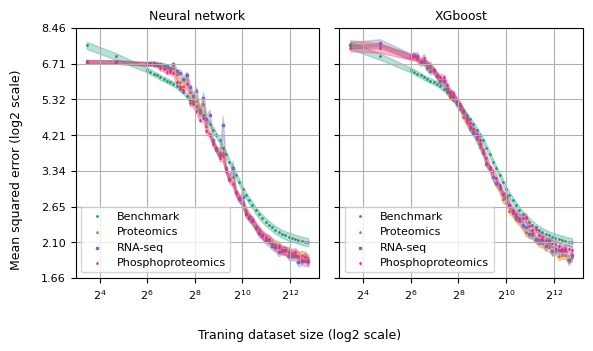

In [83]:
#plots of full LC no fits with S.E and mm benchmark
_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phosphoproteomics']
start = 2
lc_plot([mse_mm, mse_cnn_prot, mse_cnn_rna, mse_cnn_ltl], ax=axs[0], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)
lc_plot([mse_mm, mse_xg_prot, mse_xg_rna, mse_xg_ltl], ax=axs[1], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
plt.savefig('Figs/Data_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

In [47]:
#mm does better than one hot for the datapoint
mse_mm.mean(axis=1).iloc[-1], mse_xg_hot.mean(axis=1).iloc[-1]


(2.0992514457992053, 2.1572058888088415)

## Figure 2 (d) plots

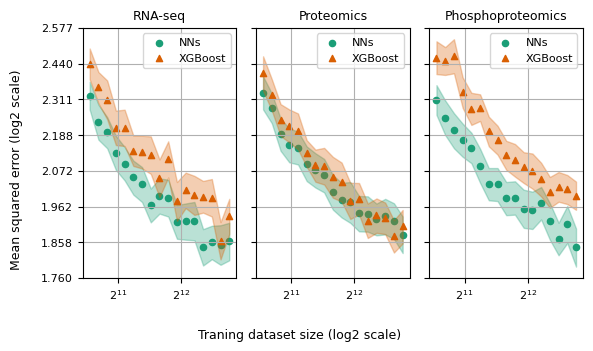

In [84]:
# model comp
fig, axs = plt.subplots(1, 3, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['NNs', 'XGBoost']
start = 37
lc_plot([mse_cnn_rna, mse_xg_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_prot, mse_xg_prot], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_ltl, mse_xg_ltl], ax=axs[2], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('RNA-seq', fontsize=_fontsize)
axs[1].set_title('Proteomics',fontsize=_fontsize)
axs[2].set_title('Phosphoproteomics',fontsize=_fontsize)


fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig('Figs/Model_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

## Dark mode plotting

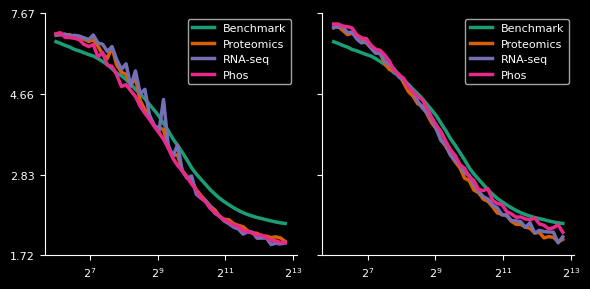

In [16]:
nn_dfs = [mse_mm, mse_cnn_prot, mse_cnn_rna, mse_cnn_phos2]
xg_dfs = [mse_mm, mse_xg_prot, mse_xg_rna, mse_xg_phos]
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phos']
start = 4
end = None

plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
x = nn_dfs[0].index[start: end]
y_nn = [df.mean(axis=1)[start: end] for df in nn_dfs]
y_xg = [df.mean(axis=1)[start: end] for df in xg_dfs]

for ax in axs:
    #ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
#axs[0].set_title('Neural network', fontsize=_fontsize)
#axs[1].set_title('XGboost',fontsize=_fontsize)
#fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
#fig.supylabel(_ax_labels[1], fontsize=_fontsize)

plot_nb.multi_lines_scatter(x=x, ys=y_nn, ax=axs[0], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, update_xticks=False)

plot_nb.multi_lines_scatter(x=x, ys=y_xg, ax=axs[1], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, 
                            update_xticks=False)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.savefig('Poster_line.png', dpi=1000, bbox_inches='tight')

## Tables
extracts metrics that are used in the table. 

In [92]:
def extract_spear(df, train_set_size_ind=-1):
    vals = []
    for run in  df.iloc[train_set_size_ind]:
        val = float(run.split(',')[0].split('(')[1])
        vals.append(val)
    return np.array(vals)

In [71]:
reps = 30
mse_xg_rna.iloc[-1].mean(axis=0), mse_xg_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9335211001188561, 0.05173020535156629)

In [ ]:
'1.93(5)'

In [18]:
mse_xg_prot.iloc[-1].mean(axis=0), mse_xg_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9033095882468627, 0.04849915650271851)

In [ ]:
'1.90(5)'

In [72]:
mse_xg_ltl.iloc[-1].mean(axis=0), mse_xg_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9952330699640688, 0.04291638260132684)

In [ ]:
'2.00(4)'

In [19]:
mse_xg_phos.iloc[-1].mean(axis=0), mse_xg_phos.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9892285479765386, 0.05953368388764961)

In [ ]:
'1.99(6)'

In [20]:
mse_cnn_rna.iloc[-1].mean(axis=0), mse_cnn_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8608589231284454, 0.05324485042480901)

In [ ]:
'1.86(5)'

In [21]:
mse_cnn_prot.iloc[-1].mean(axis=0), mse_cnn_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8800975618584572, 0.05229997053962444)

In [ ]:
'1.88(5)'

In [73]:
mse_cnn_ltl.iloc[-1].mean(axis=0), mse_cnn_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8438847480277725, 0.05353739213555456)

In [ ]:
'1.84(5)'

In [74]:
mse_cnn_phos2.iloc[-1].mean(axis=0), mse_cnn_phos2.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8653549315947608, 0.05298161009555654)

In [ ]:
'1.85(5)'

In [16]:
mse_mm.iloc[-1].mean(axis=0), mse_mm.iloc[-1].std(axis=0) / (reps ** 0.5)

(2.0992514457992053, 0.05603098353702007)

In [79]:
table_mse = {'XGBoost': [], 'Neural Network': []}
table_mse['XGBoost'].append('1.93(5)')
table_mse['XGBoost'].append('1.90(5)')
table_mse['XGBoost'].append('2.00(4)')
table_mse['Neural Network'].append('1.86(5)')
table_mse['Neural Network'].append('1.88(5)')
table_mse['Neural Network'].append('1.84(5)')
table_mse = pd.DataFrame(table_mse, index=['RNA-seq', 'Proteomics', 'Phosphoproteomics'])
table_mse

,XGBoost,Neural Network
RNA-seq,1.93(5),1.86(5)
Proteomics,1.90(5),1.88(5)
Phosphoproteomics,2.00(4),1.84(5)


In [25]:
 table_mse.to_csv('Figs/rpp_mse.csv')

In [85]:
r2_cnn_ltl.iloc[-1].mean(axis=0), r2_cnn_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7260905151231788, 0.007676122225649822)

In [86]:
r2_cnn_rna.iloc[-1].mean(axis=0), r2_cnn_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7234075259901988, 0.007876853503699377)

In [87]:
r2_cnn_prot.iloc[-1].mean(axis=0), r2_cnn_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7209655222648532, 0.007010663040449865)

In [98]:
extract_spear(rho_cnn_prot).mean(), extract_spear(rho_cnn_ltl).mean(), extract_spear(rho_cnn_rna).mean()

(0.858815066545198, 0.8615124489149832, 0.859694794707922)

In [99]:
extract_spear(rho_cnn_prot).std(), extract_spear(rho_cnn_ltl).std(), extract_spear(rho_cnn_rna).std()

(0.018027474491103004, 0.018311501404895663, 0.02005218685804529)

## Variation anylsis
compares results within test train splits 

<BarContainer object of 30 artists>

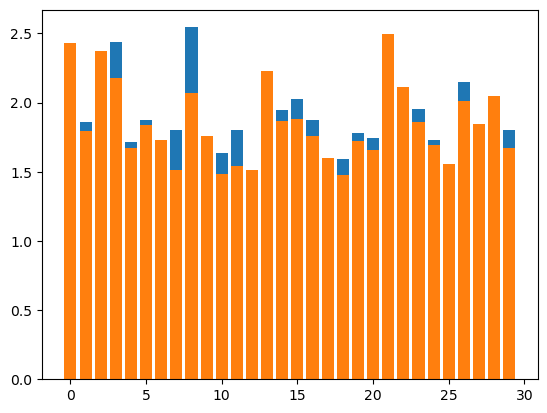

In [76]:
x = np.arange(len(mse_cnn_prot.T))
plt.bar(x, mse_cnn_prot.iloc[-1])
plt.bar(x, mse_cnn_phos.iloc[-1])

In [50]:
def ave_ranking(results1, results2, metric='mse'):
    '''comp where r1 is better than r2
    '''
    results1.index = range(len(results1))
    results2.index = range(len(results2))
    #mse lower better
    diff = results1 - results2
    if metric == 'mse':
        r1_mask = diff < 0
        r2_mask = diff > 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (1 - results1[r1_mask] / results2[r1_mask]) * 100
        r2_per_improve = (1 - results1[r2_mask] / results2[r2_mask]) * 100
        
    #other metircs higher better   
    else:
        r1_mask = diff > 0
        r2_mask = diff < 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (results1[r1_mask] / results2[r1_mask] - 1) * 100
        r2_per_improve = (results1[r2_mask] / results2[r2_mask] - 1) * 100
        
    print(num_r1_top)
    
    return r1_per_improve, r2_per_improve,   num_r1_top
    

## Phos comparisons

## MSE plot

In [40]:
def multi_mean_ranking(df): 
    
    rankings = {}
    for d_type in df.columns:
        rankings[d_type] = []
    for _, row in df.iterrows():
        row = row.sort_values(ascending=True)
        for d_type in df.columns:
            rank = np.where(row.index==d_type)[0][0]
            rankings[d_type].append(rank + 1)
    rankings_df = pd.DataFrame(
        [np.mean(rankings[d_type]) for d_type in df.columns])
    rankings_df.index = df.columns
    
    
    
    return rankings_df

In [81]:
df = pd.DataFrame((mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1], 
                   mse_xg_ltl.iloc[-1]), index=['rna', 'prot', 'phos']).T
multi_mean_ranking(df)

,0
rna,1.800000
prot,1.733333
phos,2.466667


In [82]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['phos', 'rna', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.966667
rna,1.800000
prot,2.233333


In [44]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1]), 
                  index=['phos', 'rna']).T
multi_mean_ranking(df)

,0
phos,1.566667
rna,1.433333


In [45]:
df = pd.DataFrame((mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.366667
prot,1.633333


In [46]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['phos', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.4
prot,1.6


## XG

In [65]:
df = pd.DataFrame((mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1]), 
                  index=['phos', 'rna']).T
multi_mean_ranking(df)

,0
phos,1.7
rna,1.3


In [161]:
df = pd.DataFrame((mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1]), 
                  index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.5
prot,1.5


In [66]:
df = pd.DataFrame((mse_xg_ltl.iloc[-1], mse_xg_prot.iloc[-1]), 
                  index=['phos', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.766667
prot,1.233333


9
13
7
18


AttributeError: 'numpy.ndarray' object has no attribute 'get_legend_handles_labels'

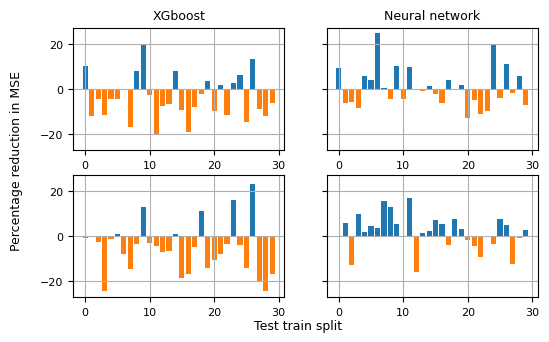

In [67]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(2, 2, figsize=_figsize, sharey=True)

phos_imp, rna_imp, _ = ave_ranking(mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1])
axs[0, 0].bar(phos_imp.index, phos_imp, label='Phos lower MSE')
axs[0, 0].bar(rna_imp.index, rna_imp, label='RNA lower MSE')
#axs[0, 0].set_ylabel('Percentage reduction in MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1])
axs[0, 1].bar(rna_imp.index, rna_imp)
axs[0, 1].bar(xg_imp.index, xg_imp,)



phos_imp, rna_imp, _ = ave_ranking(mse_xg_ltl.iloc[-1], mse_xg_prot.iloc[-1])
axs[1, 0].bar(phos_imp.index, phos_imp, label='Phos lower MSE')
axs[1, 0].bar(rna_imp.index, rna_imp, label='RNA lower MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_ltl.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1, 1].bar(rna_imp.index, rna_imp)
axs[1, 1].bar(xg_imp.index, xg_imp,)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0, 0].set_title('XGboost',fontsize=_fontsize)
axs[0, 1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
fig.supylabel('Percentage reduction in MSE', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.show()

15
18
19


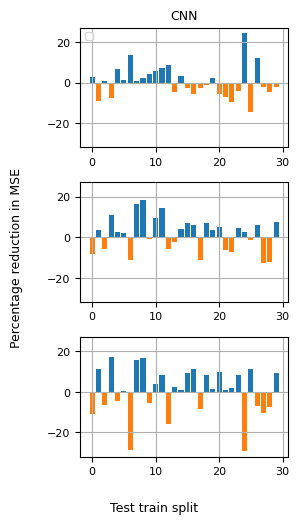

In [154]:
_figsize = (3, (3.5 * 1.5)) 
_fontsize = 9

fig, axs = plt.subplots(3, figsize=_figsize, sharey=True, layout='tight')


rna_imp, xg_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_rna.iloc[-1])
axs[0].bar(rna_imp.index, rna_imp)
axs[0].bar(xg_imp.index, xg_imp,)

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp,)

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])
axs[2].bar(rna_imp.index, rna_imp)
axs[2].bar(xg_imp.index, xg_imp,)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('CNN',fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
fig.supylabel('Percentage reduction in MSE', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.show()

In [97]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_rna.iloc[-1])

15


In [100]:
r2_imp.mean()

-5.455001090133583

In [101]:
r1_imp.mean()

6.4107039207665215

In [88]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_prot.iloc[-1])

18


In [102]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])

19


In [94]:
r2_imp.mean()

-7.118912944085039

In [95]:
r1_imp.mean()

7.297043006392867

In [43]:
mse_cnn_prot.iloc[-1].mean()

1.8800975618584572

In [59]:
mse_cnn_prot.iloc[-1] * 0.886

run0     1.993309
run1     1.647045
run2     1.981770
run3     2.161855
run4     1.520909
run5     1.662693
run6     1.380272
run7     1.596058
run8     2.254323
run9     1.543816
run10    1.446184
run11    1.596443
run12    1.264371
run13    1.930774
run14    1.725027
run15    1.793512
run16    1.662908
run17    1.273106
run18    1.408596
run19    1.579539
run20    1.543592
run21    2.077097
run22    1.740265
run23    1.728444
run24    1.534830
run25    1.359339
run26    1.902761
run27    1.451798
run28    1.615532
run29    1.596827
Name: 6949, dtype: float64

In [57]:
mse_cnn_rna.iloc[-1] *

run0     2.497630
run1     1.647793
run2     2.386320
run3     2.022474
run4     1.790349
run5     1.866764
run6     2.004477
run7     1.520916
run8     2.117682
run9     1.835016
run10    1.572744
run11    1.655197
run12    1.655924
run13    2.130392
run14    1.933683
run15    1.837443
run16    1.667871
run17    1.555775
run18    1.457345
run19    1.760794
run20    1.568616
run21    2.328073
run22    1.929631
run23    1.786661
run24    2.237502
run25    1.358909
run26    2.293147
run27    1.809020
run28    1.959391
run29    1.638228
Name: 6949, dtype: float64

In [73]:
mask = mse_cnn_rna.iloc[-1] - mse_cnn_prot.iloc[-1] < 0
r1_improve = (1 - mse_cnn_rna.iloc[-1] [mask] / mse_cnn_prot.iloc[-1][mask])* 100 
r1_improve.mean()

7.754929543336902

In [78]:
len(r2_improve), len(r1_improve)

(11, 19)

In [75]:
mask = mse_cnn_rna.iloc[-1] - mse_cnn_prot.iloc[-1] > 0
r2_improve = (1 - mse_cnn_prot.iloc[-1] [mask] / mse_cnn_rna.iloc[-1][mask])* 100 
r2_improve.mean()

10.398424388242612

In [44]:
mse_cnn_rna.iloc[-1].mean()

1.8608589231284454

In [35]:
mse_cnn_prot.iloc[-1] / mse_cnn_rna.iloc[-1]

run0     0.900767
run1     1.128155
run2     0.937327
run3     1.206452
run4     0.958809
run5     1.005284
run6     0.777195
run7     1.184431
run8     1.201494
run9     0.949558
run10    1.037843
run11    1.088604
run12    0.861788
run13    1.022912
run14    1.006878
run15    1.101683
run16    1.125310
run17    0.923600
run18    1.090914
run19    1.012483
run20    1.110663
run21    1.006993
run22    1.017905
run23    1.091892
run24    0.774218
run25    1.129025
run26    0.936523
run27    0.905794
run28    0.930595
run29    1.100145
Name: 6949, dtype: float64

box plot

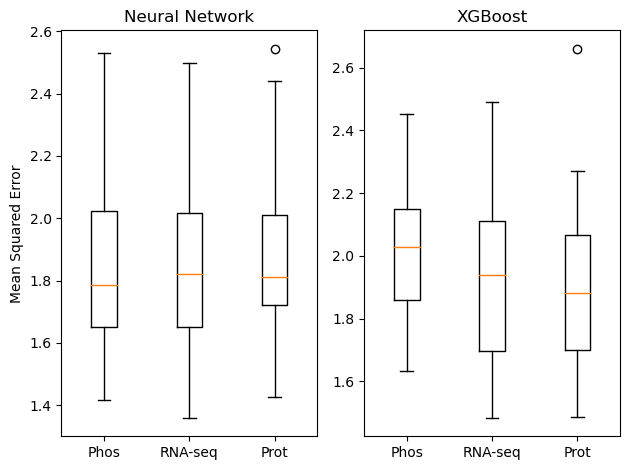

In [43]:
fig, ax = plt.subplots(ncols=2, layout='tight')
ax[0].boxplot([mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]] )
ax[0].set_xticklabels(['Phos', 'RNA-seq', 'Prot'])
ax[0].set_title('Neural Network')
ax[1].boxplot([mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1]] )
ax[1].set_title('XGBoost')
ax[1].set_xticklabels(['Phos', 'RNA-seq', 'Prot'])
ax[0].set_ylabel('Mean Squared Error')
plt.savefig('BoxPlot.png', dpi=600, bbox_inches='tight')
plt.show()

In [22]:
mse_cnn_phos.iloc[-1].mean()

1.845140904174391

In [19]:
mse_cnn_rna.iloc[-1].mean()

1.8608589231284454

In [18]:
mse_cnn_prot.iloc[-1].mean()

1.8800975618584572